<a href="https://colab.research.google.com/github/myndaaa/Natural-Language-Processing/blob/main/credit_task_stuff/FNLP_credit_mysha_Nahiyan_Shemontee_102773618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question**
The digital economy is growing exponentially even here in Sarawak. Dr Joel wants to create an
online shopping platform specifically for Sarawak. He was disappointed by the heavy shipping
charges for the current shopping platforms (Shipee and Leezada). He wants to create a platform
called Sarapee Shopping. To get started on his idea he wants to do some competition analysis to
view how many different types of products his future competitors are selling. He has tasked you to
build an NLP classifier to classify product categories based on product descriptions.
Figure 1: Example of Product & Description
Dataset:
The dataset is in ".csv" format with two columns - the first column is the class name and the second
one is the datapoint of that class. The data point is the product and description from the e-commerce
website. The dataset has the following features :
Data Set Characteristics: Multivariate
Number of Instances: 50425
Number of classes: 4



dataset:
• Gautam. (2019). E commerce text dataset (version - 2) [Data set].
Zenodo. https://doi.org/10.5281/zenodo.3355823

**TO DO**


---

Specific Tasks

Exploratory Data Analysis
1.  Charts/tables to describe the dataset

Preprocessing
1.  Removal of stopwords/punctuations
2. Tokenization
3. Vectorization/Word Embeddings

Classification
1.  Training/test data split
2. Building & compiling a CNN model
3. Training a CNN model
4. Showing performance of testing

          --Classification report or other measures
          --Confusion matrix
5.  Test on real-world product descriptions (English)minimum 3 from 1 class each
6. Saving model


---



---






#

In [ ]:
import pandas as pd
import seaborn as sns
import re, nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from matplotlib import pyplot
from nltk.corpus import stopwords
import string
from sklearn.model_selection import cross_val_score
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Dropout

nltk.download('punkt')
nltk.download('stopwords')
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset_path = "/content/ecommerceDataset.csv"  # Replace "path_to_your_dataset2.csv" with the actual path to your dataset
column_names = ["class", "feature"]
# Read the CSV file into a DataFrame with specified column names
ecommerce_data = pd.read_csv(dataset_path, names=column_names)

In [ ]:
# Display the first few rows of the dataset
print(ecommerce_data.head())

       class                                            feature
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "/content/ecommerceDataset.csv"
column_names = ["class", "feature"]
# Read the CSV file into a DataFrame with specified column names
ecommerce_data = pd.read_csv(dataset_path, names=column_names)

# Get the unique class names
class_names = ecommerce_data.iloc[:, 0].unique()

# Split the dataset into train, test, and validation sets
train, test_val = train_test_split(ecommerce_data, test_size=0.2, random_state=42, stratify=ecommerce_data.iloc[:, 0])
test, val = train_test_split(test_val, test_size=0.5, random_state=42, stratify=test_val.iloc[:, 0])

# Print the sizes of the splits
print("Train set size:", len(train))
print("Test set size:", len(test))
print("Validation set size:", len(val))

Train set size: 40340
Test set size: 5042
Validation set size: 5043


In [ ]:
ecommerce_train = train
ecommerce_test = test
ecommerce_val = val
print("First entry of the train dataset:")
print(ecommerce_train.iloc[0])

First entry of the train dataset:
class                                                  Books
feature    Rearming hinduism: 1 Review "While the name of...
Name: 24147, dtype: object


In [ ]:
print("\nColumn names of the dataset:")
print(ecommerce_train.columns)


Column names of the dataset:
Index(['class', 'feature'], dtype='object')


In [ ]:
print("\nFeatures of the dataset:")
print(ecommerce_train.iloc[:, :])


Features of the dataset:
             class                                            feature
24147        Books  Rearming hinduism: 1 Review "While the name of...
18920    Household  Black+Decker Hand Tool Kit (108-Piece), Orange...
48793  Electronics  Orient Electric Aeroquiet 1200mm Premium Ceili...
1098     Household  Urbancart Tempered Glass Table Top Folding Rou...
15744    Household  Eveready OFR13FG 2900-Watt Oil Filled Radiator...
...            ...                                                ...
42248  Electronics  Casio FX-100MS Scientific Calculator Many diff...
11738    Household  All Time Plastic Mixing Bowl Set, 800ml, Set o...
42556  Electronics  Zebronics Laptop Cooling Pad (Color May Vary) ...
46026  Electronics  HITSAN INCORPORATION Zomei Filtro Ultra Slim F...
25044        Books  The Everything Kids' Learning French Book: Fun...

[40340 rows x 2 columns]


In [ ]:
print(len(ecommerce_train) )

40340


In [ ]:
print(len(ecommerce_test) )

5042


In [ ]:
print(len(ecommerce_val) )

5043


# Data Overview

In [ ]:
train.head()

,class,feature
24147,Books,"Rearming hinduism: 1 Review ""While the name of..."
18920,Household,"Black+Decker Hand Tool Kit (108-Piece), Orange..."
48793,Electronics,Orient Electric Aeroquiet 1200mm Premium Ceili...
1098,Household,Urbancart Tempered Glass Table Top Folding Rou...
15744,Household,Eveready OFR13FG 2900-Watt Oil Filled Radiator...


In [ ]:
val.head()

,class,feature
48327,Electronics,Acumen Track UC 901 Water/Dust Proof GPS Track...
35195,Clothing & Accessories,Puma Men's Track Jacket Puma presents to you m...
25104,Books,Bestofferbuy 4CH Remote Control Wall Climbing ...
4263,Household,"Borosil Akhand Diya (Medium, Brass) Size:Mediu..."
46659,Electronics,Tiny Deal Compact 10x25 Mini Binoculars Telesc...


In [ ]:
test.head()

,class,feature
36346,Clothing & Accessories,Siddeshwary Fab Lehenga Choli This Product is ...
8792,Household,Philips T-Bulb Base B22 10-Watt LED Lamp (Cool...
23110,Books,CBSE All In One Computer Science CBSE Class 1...
41553,Electronics,Synology DiskStation DS718+ Network Attached S...
43295,Electronics,Amkette 30 Pin to USB Charging & Data Sync Cab...


lets see all classes

In [ ]:
train["class"].unique()

array(['Books', 'Household', 'Electronics', 'Clothing & Accessories'],
      dtype=object)

Exploring the datasets

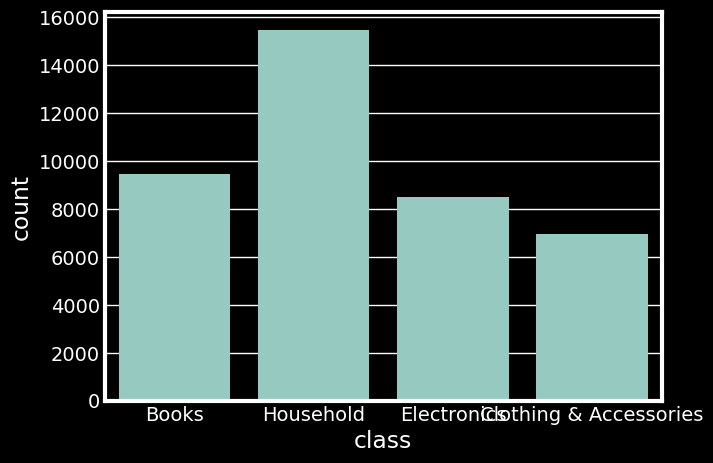

In [ ]:
train_class_quantity = sns.countplot(x="class", data=train)

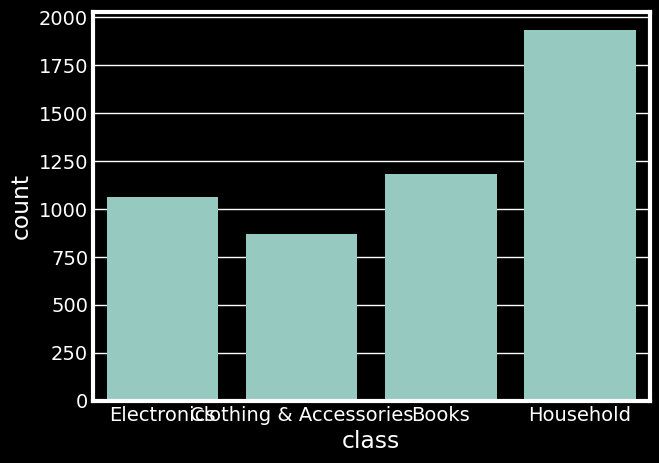

In [ ]:
val_class_quantity = sns.countplot(x="class", data=val)

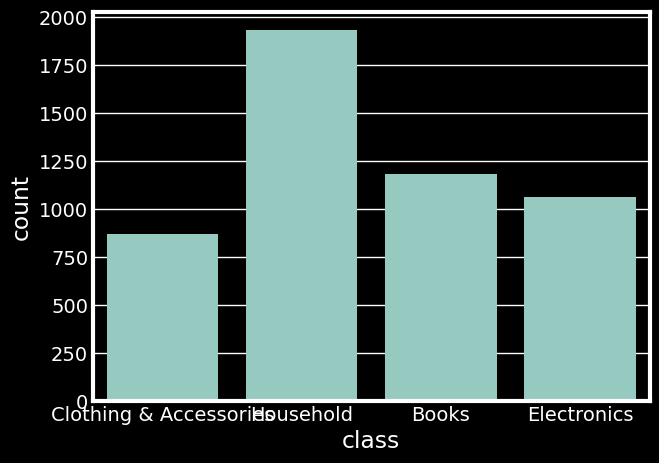

In [ ]:
test_class_quantity = sns.countplot(x="class", data=test)

# Preprocessing

In [ ]:
# Function to tokenize
def tokenize_text(text):
    # Tokenize the text and remove non-alphabetic characters
    tokens = nltk.word_tokenize(re.sub("[^a-zA-Z]", " ", text))
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Join the cleaned tokens back into a sentence
    return ' '.join(tokens)


# Function to process text
def text_preprocess(msg):
    # Remove punctuation characters
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Split the text into words and remove stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
testing_def = "Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
print(text_preprocess(testing_def))

Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints 87 X 87 inch Set 4 Painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang would proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch 100 inks achieve brilliant true colours Due high level uv resistance prints retain beautiful colours many years Add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit would treasured forever whoever lucky recipient Liven place intriguing paintings high definition hd graphic digital prints home office room


In [ ]:
testing_def1 = "hi, hello, this is alexandar the great; i conquer"
print(text_preprocess(testing_def1))

hi hello alexandar great conquer


In [ ]:
# Check the data type of the 'feature' column
print(train['feature'].dtype)


object


In [ ]:
# Checking for non-string values in the 'feature' column
non_string_values = train['feature'].apply(lambda x: type(x) != str)
print(non_string_values.sum())


1


In [ ]:
# Convert non-string values to string
train['feature'] = train['feature'].astype(str)
test['feature'] = test['feature'].astype(str)
val['feature'] = val['feature'].astype(str)

In [ ]:
# tokenize
train['tok_feature'] = train['feature'].apply(tokenize_text)
train.head()

,class,feature,tok_feature
24147,Books,"Rearming hinduism: 1 Review ""While the name of...",rearming hinduism review while the name of the...
18920,Household,"Black+Decker Hand Tool Kit (108-Piece), Orange...",black decker hand tool kit piece orange and black
48793,Electronics,Orient Electric Aeroquiet 1200mm Premium Ceili...,orient electric aeroquiet mm premium ceiling f...
1098,Household,Urbancart Tempered Glass Table Top Folding Rou...,urbancart tempered glass table top folding rou...
15744,Household,Eveready OFR13FG 2900-Watt Oil Filled Radiator...,eveready ofr fg watt oil filled radiator white


same for others

In [ ]:
val['tok_feature'] = val['feature'].apply(tokenize_text) #tok val dataet
val.head()

,class,feature,tok_feature
48327,Electronics,Acumen Track UC 901 Water/Dust Proof GPS Track...,acumen track uc water dust proof gps tracker f...
35195,Clothing & Accessories,Puma Men's Track Jacket Puma presents to you m...,puma men s track jacket puma presents to you m...
25104,Books,Bestofferbuy 4CH Remote Control Wall Climbing ...,bestofferbuy ch remote control wall climbing c...
4263,Household,"Borosil Akhand Diya (Medium, Brass) Size:Mediu...",borosil akhand diya medium brass size medium h...
46659,Electronics,Tiny Deal Compact 10x25 Mini Binoculars Telesc...,tiny deal compact x mini binoculars telescope ...


In [ ]:
# tokenize test
test['tok_feature'] = test['feature'].apply(tokenize_text)
test.head()

,class,feature,tok_feature
36346,Clothing & Accessories,Siddeshwary Fab Lehenga Choli This Product is ...,siddeshwary fab lehenga choli this product is ...
8792,Household,Philips T-Bulb Base B22 10-Watt LED Lamp (Cool...,philips t bulb base b watt led lamp cool day l...
23110,Books,CBSE All In One Computer Science CBSE Class 1...,cbse all in one computer science cbse class fo...
41553,Electronics,Synology DiskStation DS718+ Network Attached S...,synology diskstation ds network attached stora...
43295,Electronics,Amkette 30 Pin to USB Charging & Data Sync Cab...,amkette pin to usb charging data sync cable fo...


Stpowords, punc marks removal

In [ ]:
train['tok_feature'] = train['tok_feature'].apply(text_preprocess)
train.reset_index(drop=True, inplace = True)
train.head()

,class,feature,tok_feature
0,Books,"Rearming hinduism: 1 Review ""While the name of...",rearming hinduism review name book rearming hi...
1,Household,"Black+Decker Hand Tool Kit (108-Piece), Orange...",black decker hand tool kit piece orange black
2,Electronics,Orient Electric Aeroquiet 1200mm Premium Ceili...,orient electric aeroquiet mm premium ceiling f...
3,Household,Urbancart Tempered Glass Table Top Folding Rou...,urbancart tempered glass table top folding rou...
4,Household,Eveready OFR13FG 2900-Watt Oil Filled Radiator...,eveready ofr fg watt oil filled radiator white


In [ ]:
val['tok_feature'] = val['tok_feature'].apply(text_preprocess)
val.reset_index(drop=True, inplace = True)
val.head()

,class,feature,tok_feature
0,Electronics,Acumen Track UC 901 Water/Dust Proof GPS Track...,acumen track uc water dust proof gps tracker c...
1,Clothing & Accessories,Puma Men's Track Jacket Puma presents to you m...,puma men track jacket puma presents mns graphi...
2,Books,Bestofferbuy 4CH Remote Control Wall Climbing ...,bestofferbuy ch remote control wall climbing c...
3,Household,"Borosil Akhand Diya (Medium, Brass) Size:Mediu...",borosil akhand diya medium brass size medium h...
4,Electronics,Tiny Deal Compact 10x25 Mini Binoculars Telesc...,tiny deal compact x mini binoculars telescope ...


In [ ]:
test['tok_feature'] = test['tok_feature'].apply(text_preprocess)
test.reset_index(drop=True, inplace = True)
test.head()

,class,feature,tok_feature
0,Clothing & Accessories,Siddeshwary Fab Lehenga Choli This Product is ...,siddeshwary fab lehenga choli product manufact...
1,Household,Philips T-Bulb Base B22 10-Watt LED Lamp (Cool...,philips bulb base b watt led lamp cool day lig...
2,Books,CBSE All In One Computer Science CBSE Class 1...,cbse one computer science cbse class author ed...
3,Electronics,Synology DiskStation DS718+ Network Attached S...,synology diskstation ds network attached stora...
4,Electronics,Amkette 30 Pin to USB Charging & Data Sync Cab...,amkette pin usb charging data sync cable iphon...


In [ ]:
# From the nlpia package for downloading data too big for the repo
BIG_URLS = {
    'w2v': (
        'https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1',
        1647046227,
    ),
    'slang': (
        'https://www.dropbox.com/s/43c22018fbfzypd/slang.csv.gz?dl=1',
        117633024,
    ),
    'tweets': (
        'https://www.dropbox.com/s/5gpb43c494mc8p0/tweets.csv.gz?dl=1',
        311725313,
    ),
    'lsa_tweets': (
        'https://www.dropbox.com/s/rpjt0d060t4n1mr/lsa_tweets_5589798_2003588x200.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
    'imdb': (
        'https://www.dropbox.com/s/yviic64qv84x73j/aclImdb_v1.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
}

In [ ]:
import os
import re
import tarfile
import tqdm

import requests

#from pugnlp.futil import path_status, find_files

# These functions are part of the nlpia package which can be pip installed and run from there.
def dropbox_basename(url):
    filename = os.path.basename(url)
    match = re.findall(r'\?dl=[0-9]$', filename)
    if match:
        return filename[:-len(match[0])]
    return filename

def download_file(url, data_path='.', filename=None, size=None, chunk_size=4096, verbose=True):
    """Uses stream=True and a reasonable chunk size to be able to download large (GB) files over https"""
    if filename is None:
        filename = dropbox_basename(url)
    file_path = os.path.join(data_path, filename)
    if url.endswith('?dl=0'):
        url = url[:-1] + '1'  # noninteractive download
    if verbose:
        tqdm_prog = tqdm
        print('requesting URL: {}'.format(url))
    else:
        tqdm_prog = no_tqdm
    r = requests.get(url, stream=True, allow_redirects=True)
    size = r.headers.get('Content-Length', None) if size is None else size
    print('remote size: {}'.format(size))

    # stat = path_status(file_path)
    # print('local size: {}'.format(stat.get('size', None)))
    # if stat['type'] == 'file' and stat['size'] == size:  # TODO: check md5 or get the right size of remote file
    #     r.close()
    #     return file_path

    print('Downloading to {}'.format(file_path))

    with open(file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive chunks
                f.write(chunk)

    r.close()
    return file_path

def untar(fname):
    if fname.endswith("tar.gz"):
        with tarfile.open(fname) as tf:
            tf.extractall()
    else:
        print("Not a tar.gz file: {}".format(fname))

In [ ]:
download_file(BIG_URLS['w2v'][0])

requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1
remote size: 1647046227


'./GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train.info()
val.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40340 entries, 0 to 40339
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        40340 non-null  object
 1   feature      40340 non-null  object
 2   tok_feature  40340 non-null  object
dtypes: object(3)
memory usage: 945.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        5043 non-null   object
 1   feature      5043 non-null   object
 2   tok_feature  5043 non-null   object
dtypes: object(3)
memory usage: 118.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        5042 non-null   object
 1   feature      5042 non-null   object
 2   tok_feature  5042

In [ ]:
# build train datasets
train_feature = train['tok_feature'].values
train_class = train['class'].values

print(train_feature)
print(train_class)
print(len(train_feature))

['rearming hinduism review name book rearming hinduism may give appearance militancy book anything wise passionate take much misunderstood religion placed wisdom core one greatest gifts give ancestors understand understand existence well worth working hard worth fighting vamsee amish tripathi author shiva trilogy great book every indian read anand neelakantan author asura author vamsee juluri professor media studies university san francisco author mythologist novel penguin india bollywood nation india cinema penguin india guru within westland forthcoming writing hinduism media current issues published foreign affairs huffington post san francisco chronicle hindu indian express elsewhere'
 'black decker hand tool kit piece orange black'
 'orient electric aeroquiet mm premium ceiling fan white color name white new orient aeroquiet ceiling fan promises highest ever air flow category heavenly silence first orient electric aero series range fans sets new standards segment inimitable design 

In [ ]:
# build val datasets
val_feature = val['tok_feature'].values
val_class = val['class'].values

print(val_feature)
print(val_class)
print(len(val_feature))

['acumen track uc water dust proof gps tracker car truck suv school bus inbuilt battery engine cut black gps tracker one best tracker water dust proof means long live gps tracker high quality hardware parts gives durability four five years going get incompatible deal price range take quick look features tracker real time tracking every time get exact location vehicle live tracking system feature enabled track routes followed driver engine notification notified every time ignition feature vehicle gets secure theft ignition cut feature stop power fuel supply engine switch vehicle engine mobile app dust proof water proof device fully water proof dust proof information call us'
 'puma men track jacket puma presents mns graphic trk jkt tr xiii flaunt favourite puma shoes let world fall love sq'
 'bestofferbuy ch remote control wall climbing climber stunt toy car color may vary wall driving car utterly astonishing gravity defying remote controlled stunt car name implies really climb walls th

In [ ]:
# build  test datasets
test_feature = test['tok_feature'].values
test_class = test['class'].values

print(test_feature)
print(test_class)
print(len(test_feature))

['siddeshwary fab lehenga choli product manufactured siddeshwary fab supply quality assured products collection regularly updated various trends fashion artist designs collection looking upon use product style product embroidered size free size upto xxl stitch type product semi stitched disclaimer product pictures indicative offers may differ slightly actual products disputes subject amazon marketplace policies'
 'philips bulb base b watt led lamp cool day light new philips bulb innovation provides light spread mini tubelight along futuristic design bulb perfect replacement conventional led bulbs'
 'cbse one computer science cbse class author editorial team highly skilled professionals arihant works hand glove ensure students receive best accurate content books inception till book comes print whole team comprising authors editors proofreaders various involved shaping book put best efforts knowledge experience produce rigorous content students receive keeping mind specific requirements 

In [ ]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def remove_html_tags(text):
    # Remove HTML tags from the text
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    # Replace multiple line breaks with a single one
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_accented_chars(text):
    # Remove accented characters from the text
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def preprocess_text_corpus(docs):
    # Normalize each document in the corpus
    normalized_docs = []
    for document in tqdm.tqdm(docs):
        # Remove HTML tags
        document = remove_html_tags(document)
        # Replace special characters with whitespace
        document = document.translate(document.maketrans("\n\t\r", "   "))
        # Convert text to lowercase
        document = document.lower()
        # Remove accented characters
        document = remove_accented_chars(document)
        # Fix contractions (e.g., "don't" to "do not")
        document = contractions.fix(document)
        # Remove non-alphanumeric characters
        document = re.sub(r'[^a-zA-Z0-9\s]', '', document, re.I|re.A)
        # Replace multiple spaces with a single space
        document = re.sub(' +', ' ', document)
        # Remove leading and trailing whitespaces
        document = document.strip()
        # Append the normalized document to the list
        normalized_docs.append(document)

    return normalized_docs

In [ ]:
%%time
normalized_train_feature = preprocess_text_corpus(train_feature)
normalized_val_feature = preprocess_text_corpus(val_feature)
normalized_test_feature = preprocess_text_corpus(test_feature)

100%|██████████| 5042/5042 [00:03<00:00, 1378.93it/s]

CPU times: user 11.7 s, sys: 94.5 ms, total: 11.8 s
Wall time: 18.6 s


In [ ]:
normalized_train_feature

['rearming hinduism review name book rearming hinduism may give appearance militancy book anything wise passionate take much misunderstood religion placed wisdom core one greatest gifts give ancestors understand understand existence well worth working hard worth fighting vamsee amish tripathi author shiva trilogy great book every indian read anand neelakantan author asura author vamsee juluri professor media studies university san francisco author mythologist novel penguin india bollywood nation india cinema penguin india guru within westland forthcoming writing hinduism media current issues published foreign affairs huffington post san francisco chronicle hindu indian express elsewhere',
 'black decker hand tool kit piece orange black',
 'orient electric aeroquiet mm premium ceiling fan white color name white new orient aeroquiet ceiling fan promises highest ever air flow category heavenly silence first orient electric aero series range fans sets new standards segment inimitable desig

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer(oov_token='')
# fit the tokenizer on the documents
t.fit_on_texts(normalized_train_feature)
t.word_index[''] = 0

max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['']


(('trolleyhub', 60915), ('', 0), 0)

In [ ]:
train_sequences = t.texts_to_sequences(normalized_train_feature)
val_sequences = t.texts_to_sequences(normalized_val_feature)
test_sequences = t.texts_to_sequences(normalized_test_feature)

In [ ]:
train_sequences
val_sequences
test_sequences

[[34005,
  8647,
  3336,
  3566,
  13,
  1159,
  34005,
  8647,
  698,
  9,
  3551,
  75,
  246,
  3552,
  1662,
  193,
  2212,
  357,
  2568,
  482,
  246,
  414,
  2149,
  5,
  13,
  43,
  13,
  3132,
  3,
  40,
  3,
  827,
  2451,
  1641,
  140,
  13,
  1787,
  1829,
  3613,
  13,
  814,
  9997,
  205,
  156,
  3754,
  951,
  1035,
  75,
  22861,
  906,
  512,
  11242,
  7693],
 [1054,
  1406,
  363,
  204,
  331,
  97,
  474,
  380,
  107,
  27,
  23,
  1054,
  1406,
  1896,
  115,
  27,
  2737,
  206,
  14773,
  398,
  7442,
  16,
  1406,
  28,
  1241,
  2278,
  97,
  3110],
 [5049,
  8,
  272,
  253,
  5049,
  366,
  17,
  1730,
  301,
  262,
  1319,
  808,
  1867,
  222,
  86,
  1502,
  276,
  168,
  710,
  26,
  902,
  141,
  48,
  1659,
  1335,
  4,
  29,
  297,
  450,
  301,
  1589,
  1084,
  1427,
  3568,
  193,
  1178,
  1645,
  4,
  364,
  26,
  1366,
  499,
  82,
  1172,
  1789,
  141,
  168,
  710,
  455,
  221,
  1024,
  570,
  168,
  193,
  971,
  955,
  34,
  408,
  1

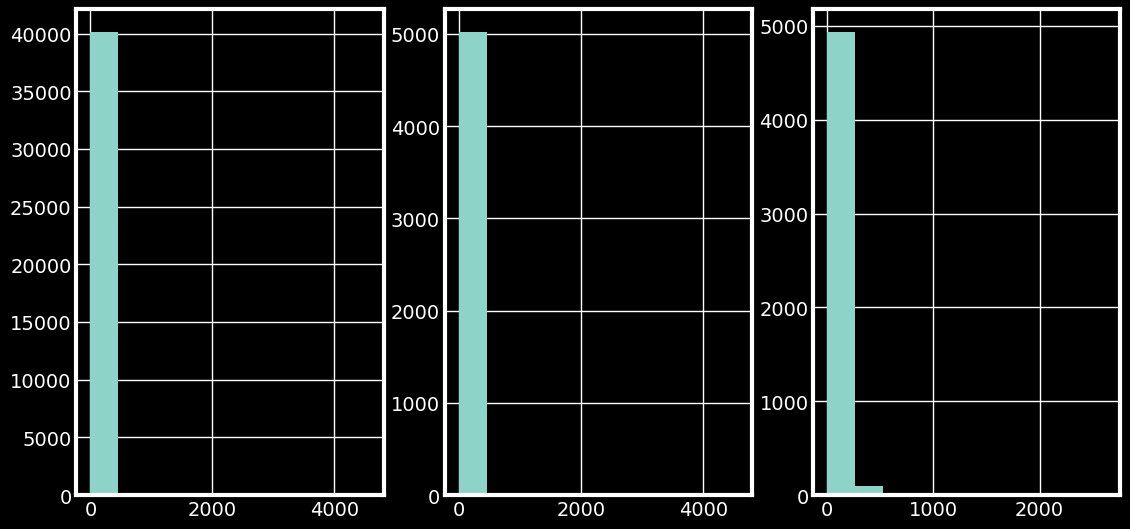

In [ ]:
import matplotlib.pyplot as plt

train_lens = [len(s) for s in train_sequences]
val_lens = [len(s) for s in val_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,3, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(val_lens)
h3 = ax[2].hist(test_lens)

# Classification

In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
size = 1000

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

X_train = sequence.pad_sequences(train_sequences, maxlen=size)
X_val = sequence.pad_sequences(val_sequences, maxlen=size)
X_test = sequence.pad_sequences(test_sequences, maxlen=size)
X_train.shape, X_val.shape, X_test.shape

((40340, 1000), (5043, 1000), (5042, 1000))

In [ ]:
le = LabelEncoder()
num_classes=4 # house, clothing, electicity and book

In [ ]:
y_train = le.fit_transform(train_class)
y_val = le.fit_transform(val_class)
y_test = le.transform(test_class)

In [ ]:
y_train

array([0, 3, 2, ..., 2, 2, 0])

In [ ]:
y_val

array([2, 1, 0, ..., 1, 3, 0])

In [ ]:
y_test

array([1, 3, 0, ..., 0, 3, 3])

In [ ]:
vocsize = len(t.word_index)
vocsize = vocsize + 1
vocsize

60916

In [ ]:
epoch = 15
embedsize = 300
batch_size = 128

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(size,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 514564 (1.96 MB)
Trainable params: 514564 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, input_shape=(size,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               512512    
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 515590 (1.97 MB)
Trainable params: 515590 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# create the model
model = Sequential()
#embedding layer
model.add(Embedding(vocsize, embedsize, input_length=size))
#a 1D Convolutional layer with 128 filters and kernel size of 4
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
#maxPooling layers downsample the input representation by taking the maximum value over a pool size.
model.add(MaxPooling1D(pool_size=2))
#add another 1D Convolutional layer with 64 filters and kernel size of 4
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))# Add another MaxPooling layer
# add another 1D Convolutional layer with 32 filters and kernel size of 4
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))# Add another MaxPooling layer
model.add(Flatten())# Flatten the output from convolutional l
# add a Dense layer with 256 units and ReLU activation function
model.add(Dense(256, activation='relu'))
# add the output layer with 4 units (number of classes) and softmax activation function
model.add(Dense(4, activation='softmax'))
# compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()# Print the model summary


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         18274800  
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1  (None, 500, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 250, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)          

In [ ]:
from keras.utils import to_categorical
# one-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_one_hot = to_categorical(y_val, num_classes=4)

print(y_train_one_hot)
print(y_val_one_hot)


[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [ ]:
# Fit the model
history = model.fit(X_train, y_train_one_hot,
          validation_data=(X_val,y_val_one_hot),
          epochs=15,
          batch_size=batch_size,
          verbose=1)

Epoch 1/15
316/316 [==============================] - 78s 224ms/step - loss: 0.3510 - accuracy: 0.8721 - val_loss: 0.1158 - val_accuracy: 0.9728
Epoch 2/15
316/316 [==============================] - 51s 161ms/step - loss: 0.0473 - accuracy: 0.9884 - val_loss: 0.1289 - val_accuracy: 0.9689
Epoch 3/15
316/316 [==============================] - 42s 132ms/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.1106 - val_accuracy: 0.9780
Epoch 4/15
316/316 [==============================] - 40s 127ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.1589 - val_accuracy: 0.9768
Epoch 5/15
316/316 [==============================] - 36s 113ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1507 - val_accuracy: 0.9794
Epoch 6/15
316/316 [==============================] - 33s 104ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.1895 - val_accuracy: 0.9774
Epoch 7/15
316/316 [==============================] - 31s 97ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1549 - val_acc

# **save**

In [ ]:
model.save('credit_task.h5') # saving to google colab n then i download

In [ ]:
#Initialising basic values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(accuracy))

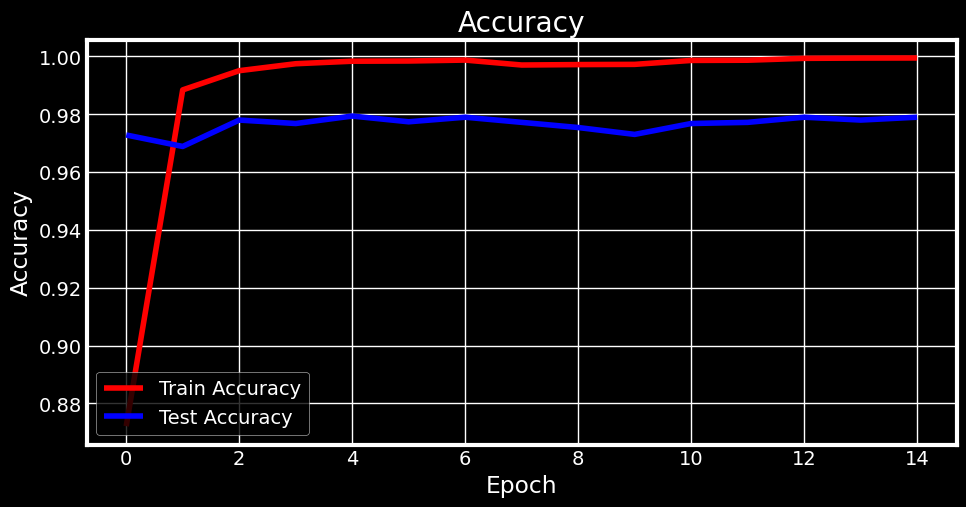

Text(0.5, 1.0, 'Training and Test loss')

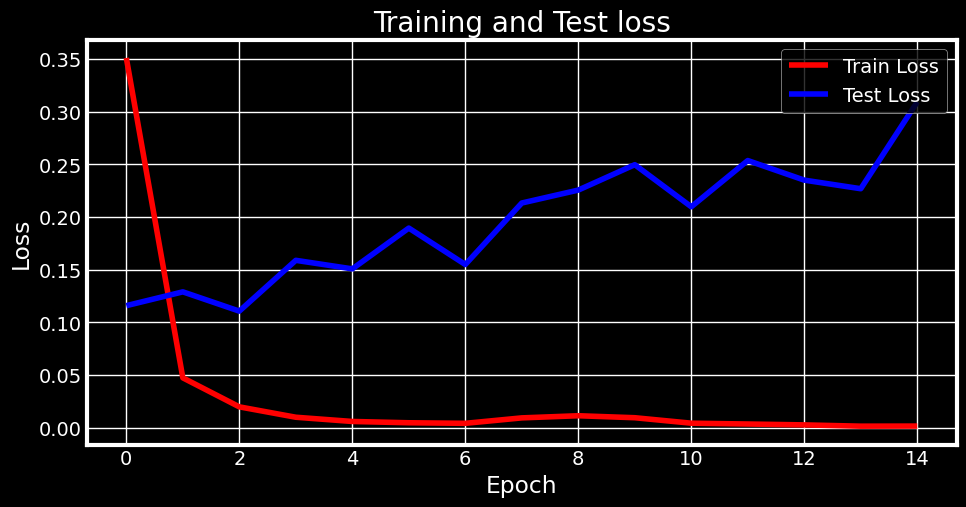

In [ ]:
#Plotting the graph for the accuracy of training and testing
fig = plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, 'r', label="Train Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower left')
plt.show()

#Plotting the graph for the loss of training and testing
fig2 = plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'r', label="Train Loss")
plt.plot(epochs, val_loss, 'b', label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test loss')

In [ ]:
from keras.utils import to_categorical
# convert to one-hot encoded vectors
y_test_one_hot = to_categorical(y_test, num_classes=4)
# print the one-hot encoded vectors
print(y_test_one_hot)


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


# Tetsing with real

In [ ]:
from tensorflow.keras.models import load_model
# load the saved model
loaded_model = load_model('/content/credit_task.h5')


In [ ]:
scores = model.evaluate(X_train, y_train_one_hot, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1261/1261 [==============================] - 10s 7ms/step - loss: 5.9848e-04 - accuracy: 0.9997
Accuracy: 99.97%


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_one_hot, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

158/158 [==============================] - 1s 9ms/step - loss: 0.2077 - accuracy: 0.9796
Accuracy: 97.96%


In [ ]:
predictions = loaded_model.predict(X_test)
list_of_predictions = []
list_of_predictions_raw = []

for prediction in predictions:
    class_label = np.argmax(prediction)
    list_of_predictions.append(train_class[class_label])
    list_of_predictions_raw.append(class_label)

print(list_of_predictions)
print(list_of_predictions_raw)
print(len(list_of_predictions))
print(len(list_of_predictions_raw))

158/158 [==============================] - 1s 6ms/step
['Household', 'Household', 'Books', 'Electronics', 'Electronics', 'Household', 'Electronics', 'Books', 'Household', 'Household', 'Household', 'Books', 'Household', 'Household', 'Household', 'Household', 'Electronics', 'Household', 'Household', 'Electronics', 'Household', 'Household', 'Books', 'Books', 'Books', 'Household', 'Electronics', 'Electronics', 'Books', 'Books', 'Books', 'Books', 'Household', 'Books', 'Household', 'Electronics', 'Household', 'Household', 'Books', 'Household', 'Household', 'Household', 'Household', 'Household', 'Books', 'Household', 'Books', 'Household', 'Household', 'Household', 'Electronics', 'Household', 'Electronics', 'Household', 'Books', 'Household', 'Household', 'Electronics', 'Household', 'Household', 'Books', 'Household', 'Household', 'Household', 'Electronics', 'Household', 'Electronics', 'Household', 'Electronics', 'Books', 'Household', 'Household', 'Books', 'Household', 'Books', 'Books', 'Electro

In [ ]:
print(np.unique(train_class))


['Books' 'Clothing & Accessories' 'Electronics' 'Household']


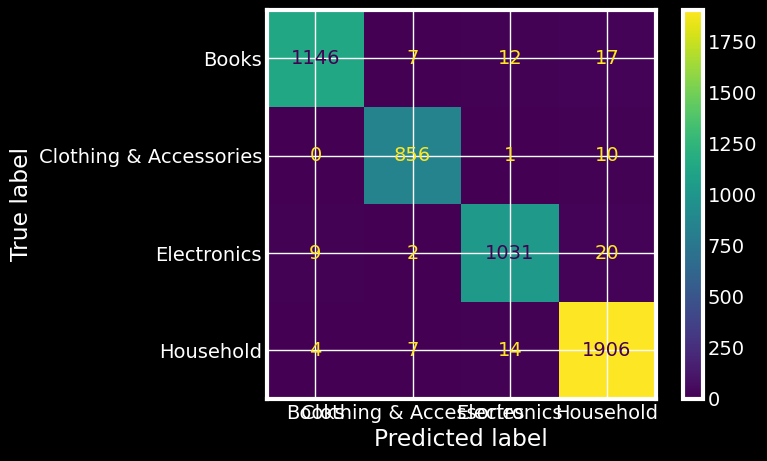

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# defining the class labels
class_labels = ['Books', 'Clothing & Accessories', 'Electronics', 'Household']

# Convert predictions
list_of_predictions = [class_labels[pred] for pred in list_of_predictions_raw]

# confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, list_of_predictions)

# display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
cm_display.plot()
plt.show()


In [ ]:
real_world_data = []

In [ ]:
book_desc1 = "The Lost City of Z by David Grann is an enthralling adventure narrative that follows the real-life expedition of British explorer Percy Fawcett into the Amazon rainforest in search of a legendary ancient civilization. Grann meticulously recounts Fawcett's journey, his encounters with indigenous tribes, and his obsession with uncovering the truth about the fabled city. Blending history, mystery, and adventure, The Lost City of Z takes readers on a thrilling quest through uncharted territory, exploring the depths of the jungle and the human spirit alike."
book_desc2 = "Cosmos by Carl Sagan is a renowned exploration of the wonders of the universe. Sagan, an astrophysicist and science communicator, takes readers on a journey through space and time, unraveling the mysteries of the cosmos. With captivating prose and insightful commentary, Cosmos offers a comprehensive overview of astronomy, cosmology, and the search for extraterrestrial life. Sagan's passion for science shines through in this timeless classic, inspiring generations of readers to marvel at the beauty and complexity of the universe."
book_desc3 = "The Victory Lab: The Secret Science of Winning Campaigns by Sasha Issenberg delves into the world of political campaigns and the use of data analytics and behavioral science to win elections. Issenberg, a journalist and author, provides an in-depth exploration of how modern political campaigns leverage technology and data-driven strategies to target voters effectively. The work is based on extensive research and interviews with key figures in the political arena, offering readers valuable insights into the strategies employed by both major parties in the United States. The Victory Lab has received acclaim for its engaging narrative and illuminating revelations about the behind-the-scenes tactics of electoral politics."

In [ ]:
elec_desc1 = "It is the 3rd version of Creality's well-known Ender-3 model, featuring numerous new features and improvements. It boasts a compact and elegant design that combines tidy X, Y, and Z-axis components, smooth T-shaped profiles, and inconspicuous tensioners, resulting in a sleek appearance. The Creality Ender-3 V3 SE stands out as a more refined option within the budget lineup compared to its predecessors, showcasing a sleek plastic base and a smooth hood on the tool head. Equipped with Creality's direct drive Sprite extruder, it offers exceptional traction for printing TPU."
elec_desc2 = "The Sonos One is a premium smart speaker that delivers stunning sound quality and seamless connectivity. With built-in voice control powered by Amazon Alexa and Google Assistant, you can play music, check the weather, set alarms, and more, all with just your voice. The Sonos One also integrates effortlessly with the Sonos app, giving you access to your favorite streaming services and personalized playlists. Its sleek and compact design makes it perfect for any room in your home, while its humidity-resistant construction allows for placement even in bathrooms or outdoor spaces. Plus, with the ability to pair multiple Sonos speakers for a multi-room audio experience, you can enjoy music throughout your entire home. Elevate your listening experience with the Sonos One Smart Speaker."
elec_desc3 = "The Raspberry Pi 5 boasts a Broadcom BCM2712 processor, featuring a 64-bit ARM Cortex-A76 architecture clocked at 2.4GHz, delivering powerful performance for a range of tasks. With a quad-core configuration and a 16nm Processor SoC, it offers efficient computing capabilities. The processor is complemented by LPDDR4X-4267 SDRAM, available in both 8GB and 4GB variants, ensuring smooth multitasking and responsiveness. The device features a metal body for improved heat dissipation, enhancing its durability and reliability. In terms of connectivity, it offers two USB 3.0 ports and two USB 2.0 ports, enabling high-speed data transfer. The VideoCore VII GPU, clocked at 800MHz, supports OpenGL ES 3.1 and Vulkan 1.2, providing immersive graphics performance. Additionally, the dual micro-HDMI ports support true 4Kp60 resolution with HDR support, enhancing the viewing experience. Storage options include a microSD slot and PCIe socket for high-speed devices like NVMe SSDs. Wireless connectivity is facilitated by IEEE 802.11.b/g/n/ac wireless LAN, Bluetooth 5.0, and BLE. Other features include Gigabit Ethernet with PoE+ HAT support, PCIe 2.0 interface, dedicated UART debug port, and expanded 40-pin GPIO header. The device is powered by a 5V/5.0A USB Type-C connector with PD support, ensuring reliable power delivery. It is bootable with the latest Raspberry Pi OS Bookworm and supports third-party operating systems. With dimensions of 88mm x 56mm x 17mm, the Raspberry Pi 5 offers compact yet versatile computing capabilities for a variety of applications."

In [ ]:
house_desc1 = "iRobot Roomba 675 Robot Vacuum: The Roomba 675 is a cutting-edge robot vacuum that takes the hassle out of cleaning your home. With its advanced navigation system and patented Dirt Detect technology, it efficiently navigates through your home, targeting areas with higher concentrations of dirt and debris. The Roomba 675 is equipped with a powerful suction system and dual multi-surface brushes, ensuring thorough cleaning on carpets, hardwood floors, and tiles. You can schedule cleaning sessions using the iRobot HOME app, or simply command it with your voice using Amazon Alexa or Google Assistant. With its sleek design and intelligent features, the Roomba 675 is the perfect companion for maintaining a clean and tidy home effortlessly."
house_desc2 = "Upholstered in high-quality fabric, the Ellis Fabric Dining Chair not only adds a soft touch but also ensures durability and easy maintenance. The cushioned seat and backrest offer exceptional comfort, making it an inviting choice for long gatherings around the dining table. Dimensions: 70cm W x 68cm D x 85cm H"
house_desc3 = "Flex your green thumb with the stately and stunning Leaf Planter. An ideal home for lush greenery, a ceramic construction offers an optimal home for soil and water, enabling plants to thrive and grow. Embossed with a flourishing foliage pattern, this intricate detail adds natural vibrancy to every setting. This ceramic pot offers waterproof properties ideal for watering plants. Available in three colours; black, white and olive. Choose from two sizes; small and large. Dimensions: (W) 36cm x (H) 42cm"

In [ ]:
cloth_desc1 = "Introducing the Adidas Women's Performance Dress, a fusion of athletic functionality and contemporary style. Crafted from high-performance materials, this dress is designed to keep you comfortable and stylish during your active pursuits. Featuring a sleek silhouette with a round neckline and short sleeves, it offers a modern look that transitions seamlessly from the gym to casual outings. Made with Adidas' signature fabric technology, it provides excellent moisture management and breathability, ensuring you stay cool and dry even during intense workouts. Whether you're hitting the tennis court or running errands, this Adidas dress is the perfect blend of sporty flair and everyday chic."
cloth_desc2 = "Elevate your athletic wardrobe with the Nike Women's Sporty Chic Dress, a versatile piece that exudes both style and performance. Constructed from Nike's premium materials, this dress combines superior comfort with a fashion-forward aesthetic. The sleek design features a flattering V-neckline and sleeveless silhouette, offering a modern and feminine look. Made with Nike's innovative Dri-FIT technology, it wicks away moisture and dries quickly to keep you feeling fresh and comfortable during your workouts. Whether you're hitting the gym or running errands, this Nike dress is sure to make a statement wherever you go."
cloth_desc3 = "Introducing the Vogue Women's Evening Gown, a luxurious and sophisticated ensemble that epitomizes elegance and glamour. Meticulously crafted from the finest materials, this gown showcases exquisite craftsmanship and attention to detail. With its timeless silhouette and delicate embellishments, it exudes an aura of effortless beauty and refinement. The gown features a plunging neckline, intricate lace detailing, and a flowing skirt that drapes gracefully with every step. Whether you're attending a red-carpet event or a formal soirée, this Vogue gown is sure to turn heads and leave a lasting impression. Embrace your inner goddess and shine bright in this stunning masterpiece from Vogue."

In [ ]:
book_desc1 = tokenize_text(book_desc1)
book_desc1 = text_preprocess(book_desc1)
book_desc2 = tokenize_text(book_desc2)
book_desc2 = text_preprocess(book_desc2)
book_desc3 = tokenize_text(book_desc3)
book_desc3 = text_preprocess(book_desc3)

real_world_data.append(book_desc1)
real_world_data.append(book_desc2)
real_world_data.append(book_desc3)

##########################
elec_desc1 = tokenize_text(elec_desc1)
elec_desc1 = text_preprocess(elec_desc1)
elec_desc2 = tokenize_text(elec_desc2)
elec_desc2 = text_preprocess(elec_desc2)
elec_desc3 = tokenize_text(elec_desc3)
elec_desc3 = text_preprocess(elec_desc3)

real_world_data.append(elec_desc1)
real_world_data.append(elec_desc2)
real_world_data.append(elec_desc3)

In [ ]:
house_desc1 = tokenize_text(house_desc1)
house_desc1 = text_preprocess(house_desc1)
house_desc2 = tokenize_text(house_desc2)
house_desc2 = text_preprocess(house_desc2)
house_desc3 = tokenize_text(house_desc3)
house_desc3 = text_preprocess(house_desc3)

real_world_data.append(house_desc1)
real_world_data.append(house_desc2)
real_world_data.append(house_desc3)

##########################
cloth_desc1 = tokenize_text(cloth_desc1)
cloth_desc1 = text_preprocess(cloth_desc1)
cloth_desc2 = tokenize_text(cloth_desc2)
cloth_desc2 = text_preprocess(cloth_desc2)
cloth_desc3 = tokenize_text(cloth_desc3)
cloth_desc3 = text_preprocess(cloth_desc3)

real_world_data.append(cloth_desc1)
real_world_data.append(cloth_desc2)
real_world_data.append(cloth_desc3)

In [ ]:
real_world_data = preprocess_text_corpus(real_world_data)
real_world_data

100%|██████████| 12/12 [00:00<00:00, 2933.93it/s]


['lost city z david grann enthralling adventure narrative follows real life expedition british explorer percy fawcett amazon rainforest search legendary ancient civilization grann meticulously recounts fawcett journey encounters indigenous tribes obsession uncovering truth fabled city blending history mystery adventure lost city z takes readers thrilling quest uncharted territory exploring depths jungle human spirit alike',
 'cosmos carl sagan renowned exploration wonders universe sagan astrophysicist science communicator takes readers journey space time unraveling mysteries cosmos captivating prose insightful commentary cosmos offers comprehensive overview astronomy cosmology search extraterrestrial life sagan passion science shines timeless classic inspiring generations readers marvel beauty complexity universe',
 'victory lab secret science winning campaigns sasha issenberg delves world political campaigns use data analytics behavioral science win elections issenberg journalist auth

In [ ]:
real_world_data = t.texts_to_sequences(real_world_data)
real_world_data

[[2141,
  1725,
  2373,
  1613,
  0,
  8075,
  2673,
  2554,
  4240,
  430,
  38,
  8998,
  2285,
  6640,
  14483,
  0,
  512,
  25868,
  1637,
  5223,
  1612,
  10209,
  0,
  4356,
  10786,
  0,
  1305,
  9291,
  7776,
  13682,
  10108,
  18237,
  3028,
  45579,
  1725,
  4564,
  269,
  3691,
  2673,
  2141,
  1725,
  2373,
  970,
  700,
  5776,
  5013,
  29592,
  10853,
  5110,
  13243,
  9630,
  501,
  2488,
  2569],
 [5904,
  8778,
  10390,
  1967,
  3558,
  7884,
  1543,
  10390,
  18335,
  253,
  12369,
  970,
  700,
  1305,
  139,
  21,
  36934,
  6165,
  5904,
  6004,
  3368,
  3662,
  6473,
  5904,
  205,
  1317,
  3204,
  6149,
  9196,
  1637,
  28204,
  38,
  10390,
  1901,
  253,
  7839,
  3532,
  360,
  1892,
  5190,
  700,
  5261,
  757,
  7437,
  1543],
 [7609,
  4881,
  2211,
  253,
  1643,
  11593,
  15802,
  0,
  9635,
  46,
  1334,
  11593,
  5,
  255,
  7537,
  7028,
  253,
  1132,
  17768,
  0,
  3039,
  17,
  115,
  1131,
  3558,
  240,
  1334,
  11593,
  9728,
  

In [ ]:
real_world_data = sequence.pad_sequences(real_world_data, maxlen=size)
real_world_data

array([[    0,     0,     0, ...,   501,  2488,  2569],
       [    0,     0,     0, ...,   757,  7437,  1543],
       [    0,     0,     0, ..., 13467, 23115,  2724],
       ...,
       [    0,     0,     0, ...,  5726,   630,  3540],
       [    0,     0,     0, ...,  2598,  1462,   164],
       [    0,     0,     0, ...,  1221,  3529,  5525]], dtype=int32)

In [ ]:
predictions = loaded_model.predict(real_world_data)

# Interpret predictions
class_labels = ['Books', 'Clothing & Accessories', 'Electronics', 'Household']
list_of_predictions = [class_labels[np.argmax(pred)] for pred in predictions]

# Print predictions
for i, prediction in enumerate(list_of_predictions):
    print(f"Description {i+1}: {prediction}")

1/1 [==============================] - 0s 53ms/step
Description 1: Books
Description 2: Books
Description 3: Books
Description 4: Electronics
Description 5: Electronics
Description 6: Electronics
Description 7: Household
Description 8: Household
Description 9: Household
Description 10: Clothing & Accessories
Description 11: Clothing & Accessories
Description 12: Clothing & Accessories
